In [1]:
# Import dependencies #

import altair as alt
import pandas as pd
import os
import numpy as np

### import data ###
# empty list to store data in 
storm_data = []

# path to folder
recent_storm_data = '..\Tornado Analysis Project\Past_5yr_Storm_data'

# recent files
for filename in os.listdir(recent_storm_data): # loop through files in folder
    filepath = os.path.join(recent_storm_data, filename)
    data = pd.read_csv(filepath, low_memory=False) # read in as CSV
    storm_data.append(data) # add data to the list


# combine the data frames
all_storm_data = pd.concat(storm_data, ignore_index=True)

# sample the data
all_storm_data.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201905,9,1554,201905,9,1830,137295,824116,TEXAS,48,...,7.0,NNE,SAN GERONIMO,29.7898,-98.6406,29.7158,-98.7744,Thunderstorms developed along a cold front as ...,Thunderstorms produced heavy rain that led to ...,CSV
1,201908,1,0,201908,7,1400,141502,849617,SOUTH DAKOTA,46,...,3.0,W,BRUCE,44.5400,-96.9600,44.4300,-96.9400,Minor flooding slowly dwindled during early Au...,"A continuation of flooding from July, the Big ...",CSV
2,201909,25,1823,201909,25,1825,141998,852808,ARIZONA,4,...,24.0,S,OCOTILLO,32.8700,-111.8800,32.8788,-111.8750,Scattered thunderstorms developed over the cen...,Scattered thunderstorms developed across the c...,CSV
3,201902,19,2226,201902,19,2350,134941,808922,ARKANSAS,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rain was heavy at times on the 19th, and there...",One-quarter inch of freezing rain was measured...,CSV
4,201902,19,2255,201902,19,2355,134941,808923,ARKANSAS,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rain was heavy at times on the 19th, and there...",One-quarter inch of freezing rain was measured...,CSV


In [2]:
all_storm_data.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [3]:
# filter for the rows with tornado data
tornado_df = all_storm_data[all_storm_data['EVENT_TYPE'] == 'Tornado']
tornado_df.count()

BEGIN_YEARMONTH       7426
BEGIN_DAY             7426
BEGIN_TIME            7426
END_YEARMONTH         7426
END_DAY               7426
END_TIME              7426
EPISODE_ID            7426
EVENT_ID              7426
STATE                 7426
STATE_FIPS            7426
YEAR                  7426
MONTH_NAME            7426
EVENT_TYPE            7426
CZ_TYPE               7426
CZ_FIPS               7426
CZ_NAME               7426
WFO                   7426
BEGIN_DATE_TIME       7426
CZ_TIMEZONE           7426
END_DATE_TIME         7426
INJURIES_DIRECT       7426
INJURIES_INDIRECT     7426
DEATHS_DIRECT         7426
DEATHS_INDIRECT       7426
DAMAGE_PROPERTY       6003
DAMAGE_CROPS          6018
SOURCE                7426
MAGNITUDE                0
MAGNITUDE_TYPE           0
FLOOD_CAUSE              0
CATEGORY                 0
TOR_F_SCALE           7426
TOR_LENGTH            7426
TOR_WIDTH             7426
TOR_OTHER_WFO         1023
TOR_OTHER_CZ_STATE    1023
TOR_OTHER_CZ_FIPS     1023
T

In [4]:
# create new data frame without unneccesary columns
columns_to_keep = ['YEAR', 'MONTH_NAME', 'BEGIN_DAY', 'STATE', 'BEGIN_DATE_TIME',
                    'END_DATE_TIME', 'INJURIES_DIRECT', 'DEATHS_DIRECT', 'DAMAGE_PROPERTY',  'DAMAGE_CROPS', 'TOR_F_SCALE',
                    'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_RANGE', 'BEGIN_LAT', 'BEGIN_LON']

tornado_df = tornado_df[columns_to_keep]

tornado_df.columns

Index(['YEAR', 'MONTH_NAME', 'BEGIN_DAY', 'STATE', 'BEGIN_DATE_TIME',
       'END_DATE_TIME', 'INJURIES_DIRECT', 'DEATHS_DIRECT', 'DAMAGE_PROPERTY',
       'DAMAGE_CROPS', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_RANGE',
       'BEGIN_LAT', 'BEGIN_LON'],
      dtype='object')

In [5]:
# view data types to see if any need to be changed
tornado_df.dtypes

YEAR                 int64
MONTH_NAME          object
BEGIN_DAY            int64
STATE               object
BEGIN_DATE_TIME     object
END_DATE_TIME       object
INJURIES_DIRECT      int64
DEATHS_DIRECT        int64
DAMAGE_PROPERTY     object
DAMAGE_CROPS        object
TOR_F_SCALE         object
TOR_LENGTH         float64
TOR_WIDTH          float64
BEGIN_RANGE        float64
BEGIN_LAT          float64
BEGIN_LON          float64
dtype: object

In [6]:
len(tornado_df)

7426

In [7]:
### Preprocessing ###

In [8]:
tornado_df['BEGIN_DATE_TIME'] = tornado_df['BEGIN_DATE_TIME'].astype('datetime64[ns]')
tornado_df['END_DATE_TIME'] = tornado_df['END_DATE_TIME'].astype('datetime64[ns]')

In [9]:
tornado_df.dtypes

YEAR                        int64
MONTH_NAME                 object
BEGIN_DAY                   int64
STATE                      object
BEGIN_DATE_TIME    datetime64[ns]
END_DATE_TIME      datetime64[ns]
INJURIES_DIRECT             int64
DEATHS_DIRECT               int64
DAMAGE_PROPERTY            object
DAMAGE_CROPS               object
TOR_F_SCALE                object
TOR_LENGTH                float64
TOR_WIDTH                 float64
BEGIN_RANGE               float64
BEGIN_LAT                 float64
BEGIN_LON                 float64
dtype: object

In [10]:
# check NA count
tornado_df.isna().sum()

YEAR                  0
MONTH_NAME            0
BEGIN_DAY             0
STATE                 0
BEGIN_DATE_TIME       0
END_DATE_TIME         0
INJURIES_DIRECT       0
DEATHS_DIRECT         0
DAMAGE_PROPERTY    1423
DAMAGE_CROPS       1408
TOR_F_SCALE           0
TOR_LENGTH            0
TOR_WIDTH             0
BEGIN_RANGE           9
BEGIN_LAT             9
BEGIN_LON             9
dtype: int64

In [11]:
# only 9 entries null for lat and lon, so they can be dropped
tornado_df = tornado_df.dropna(subset = ['BEGIN_LAT', 'BEGIN_LON'])

# only null values left are in the damage columns, they can be filled with 0 because possible that they simply did no damage
tornado_df = tornado_df.fillna(0)

### EDA

In [12]:
### calculate and identify total occurrences for each state or broader regions ###
### proportions for sampling purposes ###

### new column for broader region ###
REGIONS = {
    "NORTHEAST": ["CONNECTICUT", "DELAWARE", "MAINE", "MARYLAND", "MASSACHUSETTS", "NEW HAMPSHIRE", "NEW JERSEY", "NEW YORK", "PENNSYLVANIA", "RHODE ISLAND", "VERMONT"],
    "UPPER MIDWEST": ["IOWA", "MICHIGAN", "MINNESOTA", "WISCONSIN"],
    "OHIO VALLEY": ["ILLINOIS", "INDIANA", "KENTUCKY", "MISSOURI", "OHIO", "TENNESSEE", "WEST VIRGINIA"],
    "SOUTHEAST": ["ALABAMA", "FLORIDA", "GEORGIA", "NORTH CAROLINA", "SOUTH CAROLINA", "VIRGINIA"],
    "NORTHERN ROCKIES AND PLAINS": ["MONTANA", "NEBRASKA", "NORTH DAKOTA", "SOUTH DAKOTA", "WYOMING"],
    "SOUTH": ["ARKANSAS", "KANSAS", "LOUISIANA", "MISSISSIPPI", "OKLAHOMA", "TEXAS"],
    "SOUTHWEST": ["ARIZONA", "COLORADO", "NEW MEXICO", "UTAH"],
    "NORTHWEST": ["IDAHO", "OREGON", "WASHINGTON"],
    "WEST": ["CALIFORNIA", "NEVADA"]
}

state_to_region = {state: region for region, states in REGIONS.items() for state in states}

tornado_df['Region'] = tornado_df['STATE'].map(state_to_region)

tornado_df.head(15)


,YEAR,MONTH_NAME,BEGIN_DAY,STATE,BEGIN_DATE_TIME,END_DATE_TIME,INJURIES_DIRECT,DEATHS_DIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_LAT,BEGIN_LON,Region
2,2019,September,25,ARIZONA,2019-09-25 18:23:00,2019-09-25 18:25:00,0,0,0.00K,0.00K,EF0,0.67,50.0,24.0,32.8700,-111.8800,SOUTHWEST
5,2019,May,17,OKLAHOMA,2019-05-17 18:32:00,2019-05-17 18:39:00,0,0,0.00K,0.00K,EFU,2.88,50.0,5.0,36.9622,-100.5635,SOUTH
25,2019,August,2,IDAHO,2019-08-02 12:55:00,2019-08-02 13:05:00,0,0,0.00K,0.00K,EF0,1.00,10.0,12.0,42.6165,-113.5521,NORTHWEST
206,2019,April,24,LOUISIANA,2019-04-24 23:11:00,2019-04-24 23:28:00,1,0,30.00K,0.00K,EF1,10.00,900.0,3.0,31.8455,-93.6039,SOUTH
243,2019,April,25,LOUISIANA,2019-04-25 00:25:00,2019-04-25 00:26:00,0,0,25.00K,0.00K,EF1,1.03,200.0,1.0,32.3550,-92.9253,SOUTH
340,2019,April,25,LOUISIANA,2019-04-25 00:12:00,2019-04-25 00:15:00,0,0,25.00K,0.00K,EF1,2.52,150.0,1.0,32.2606,-93.0064,SOUTH
498,2019,April,25,LOUISIANA,2019-04-25 01:59:00,2019-04-25 02:14:00,0,0,350.00K,0.00K,EF0,8.77,700.0,2.0,31.6716,-92.2606,SOUTH
1433,2019,December,29,ALABAMA,2019-12-29 18:50:00,2019-12-29 18:57:00,0,0,0,0,EF0,5.07,50.0,2.0,34.7541,-87.0777,SOUTHEAST
1448,2019,May,19,LOUISIANA,2019-05-19 01:02:00,2019-05-19 01:05:00,0,0,0.00K,0.00K,EF0,1.19,80.0,5.0,31.3732,-92.9990,SOUTH
1737,2019,June,11,MINNESOTA,2019-06-11 15:19:00,2019-06-11 15:20:00,0,0,0.00K,0.00K,EF0,0.08,10.0,0.0,44.0028,-96.3268,UPPER MIDWEST


In [13]:
tornado_df = tornado_df.groupby(['YEAR', 'MONTH_NAME', 'BEGIN_DAY', 'STATE'], as_index = False).first()

tornado_df.head(10)

,YEAR,MONTH_NAME,BEGIN_DAY,STATE,BEGIN_DATE_TIME,END_DATE_TIME,INJURIES_DIRECT,DEATHS_DIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_LAT,BEGIN_LON,Region
0,2019,April,6,TEXAS,2019-04-06 13:10:00,2019-04-06 13:12:00,0,0,10.00K,0.00K,EF0,0.31,150.0,1.0,30.6936,-97.1968,SOUTH
1,2019,April,7,LOUISIANA,2019-04-07 19:19:00,2019-04-07 19:22:00,0,0,0,0.00K,EF0,2.58,50.0,1.0,29.9528,-90.2369,SOUTH
2,2019,April,7,MISSISSIPPI,2019-04-07 17:02:00,2019-04-07 17:04:00,0,0,0,0.00K,EF1,1.72,125.0,6.0,31.0184,-91.0712,SOUTH
3,2019,April,7,TEXAS,2019-04-07 06:24:00,2019-04-07 06:25:00,0,0,1.25M,0.00K,EF0,0.58,30.0,0.0,28.3691,-97.6643,SOUTH
4,2019,April,8,ALABAMA,2019-04-08 06:10:00,2019-04-08 06:29:00,1,0,0,0,EF1,6.10,219.0,1.0,34.2274,-86.3294,SOUTHEAST
5,2019,April,12,KENTUCKY,2019-04-12 05:45:00,2019-04-12 05:54:00,0,0,100.00K,0.00K,EF1,8.30,300.0,1.0,38.3237,-85.5185,OHIO VALLEY
6,2019,April,12,NORTH CAROLINA,2019-04-12 17:40:00,2019-04-12 17:44:00,0,0,10.00K,0.00K,EF0,4.90,100.0,2.0,35.4500,-78.9500,SOUTHEAST
7,2019,April,12,OHIO,2019-04-12 07:32:00,2019-04-12 07:33:00,0,0,15.00K,0.00K,EF0,0.75,25.0,2.0,39.8601,-83.6669,OHIO VALLEY
8,2019,April,13,ALABAMA,2019-04-13 23:14:00,2019-04-13 23:26:00,0,0,0,0,EF1,6.31,80.0,1.0,34.4617,-88.0607,SOUTHEAST
9,2019,April,13,LOUISIANA,2019-04-13 15:44:00,2019-04-13 15:50:00,0,0,0.00K,0.00K,EF0,2.81,50.0,3.0,32.2916,-91.0522,SOUTH


In [14]:
tornado_df.head()

,YEAR,MONTH_NAME,BEGIN_DAY,STATE,BEGIN_DATE_TIME,END_DATE_TIME,INJURIES_DIRECT,DEATHS_DIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_LAT,BEGIN_LON,Region
0,2019,April,6,TEXAS,2019-04-06 13:10:00,2019-04-06 13:12:00,0,0,10.00K,0.00K,EF0,0.31,150.0,1.0,30.6936,-97.1968,SOUTH
1,2019,April,7,LOUISIANA,2019-04-07 19:19:00,2019-04-07 19:22:00,0,0,0,0.00K,EF0,2.58,50.0,1.0,29.9528,-90.2369,SOUTH
2,2019,April,7,MISSISSIPPI,2019-04-07 17:02:00,2019-04-07 17:04:00,0,0,0,0.00K,EF1,1.72,125.0,6.0,31.0184,-91.0712,SOUTH
3,2019,April,7,TEXAS,2019-04-07 06:24:00,2019-04-07 06:25:00,0,0,1.25M,0.00K,EF0,0.58,30.0,0.0,28.3691,-97.6643,SOUTH
4,2019,April,8,ALABAMA,2019-04-08 06:10:00,2019-04-08 06:29:00,1,0,0,0,EF1,6.10,219.0,1.0,34.2274,-86.3294,SOUTHEAST


Climate Regions as dictated by NCEI (https://www.ncei.noaa.gov/access/monitoring/reference-maps/us-climate-regions)

In [15]:
import plotly.graph_objects as go

region_counts = tornado_df['Region'].value_counts()

fig = go.Figure(data=[go.Bar(
    x=region_counts.index,
    y=region_counts.values,  
    marker_color='skyblue'   
)])

# Update layout with title and axis labels
fig.update_layout(
    title={
        'text': "Number of Events Per Region",
        'x': 0.5,         
        'xanchor': 'center'
    },
    xaxis_title='Region',
    yaxis_title='Number of Events',
    xaxis_tickangle=-45 
)

# Show the plot
fig.show()

In [16]:
### Group tornado events by month  and calculate count totals per season ###
### proportion as well for sampling ###
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tornado_df['MONTH_NAME'] = pd.Categorical(tornado_df['MONTH_NAME'], categories=month_order, ordered=True)

monthly_occurrences = tornado_df['MONTH_NAME'].value_counts()

sorted_value_counts = monthly_occurrences.sort_index()

fig = go.Figure(data = [go.Line(
    x = sorted_value_counts.index,
    y = sorted_value_counts.values,
    mode = 'lines+markers',
    line = dict(color = 'thistle'), name = 'RGBA Color'
)]    
)

fig.update_layout(
    title={
        'text': "Monthly Occurrences",
        'x': 0.5,         
        'xanchor': 'center'
    },
    xaxis_title = 'Month',
    yaxis_title = 'Count'

)

fig.show()

c:\Users\Jwarn\anaconda3\anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [17]:
import plotly.express as px

region_counts = tornado_df['Region'].value_counts()
regional_pie = px.pie(
    region_counts,
    values = region_counts.values,
    names = region_counts.index,
    color_discrete_sequence=px.colors.sequential.Greens[::-1]
)

regional_pie.update_traces(
    hovertemplate='%{label}: %{value}<extra></extra>',
    textposition = 'inside'
)

regional_pie.update_layout(
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    width=750, 
    height=500, 
    margin=dict(
        l=75,  
        r=100,  
        t=100,  
        b=100    
    ),
    title={
        'text': "Events Per Region",
        'x': 0.5,           
        'xanchor': 'center'
        }
)

regional_pie.show()

monthly_pie = px.pie(
    monthly_occurrences,
    values = monthly_occurrences.values,
    names = monthly_occurrences.index,
    color_discrete_sequence=px.colors.sequential.Blues[::-1]
)

monthly_pie.update_traces(
    hovertemplate='%{label}: %{value}<extra></extra>',
    textposition= 'inside'
)


monthly_pie.update_layout(
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    width=750, 
    height=500, 
    margin=dict(
        l=75,  
        r=255,  
        t=100,  
        b=100    
    ),
    title={
        'text': "Events Per Month",
        'x': 0.5,           
        'xanchor': 'center'
        }
)

monthly_pie.show()


In [18]:
### Create region-month probability matrix to get my sample days to extract weather data for 'tornado days' ###

def create_matrix(df):
    matrix = pd.pivot_table(
        df,
        index='Region',        # Rows of the matrix (months)
        columns='MONTH_NAME',      # Columns of the matrix (states)
        aggfunc='size',       # Count entries
        fill_value=0          # Fill missing values with 0
    )

    return matrix

region_matrix = create_matrix(tornado_df)


In [19]:
fig = px.imshow(
    region_matrix,
    labels={'x': 'State', 'y': 'Month', 'color': 'Number of Entries'},
    title='Tornado Events by Month and State'
)

fig.update_layout(
    title={
        'text': "Events Per Month",
        'x': 0.45,           
        'xanchor': 'center'
        }
)
# Show the heatmap
fig.show()

In [87]:
# total_tornados = region_matrix.sum().sum()
# proportions_matrix = region_matrix/total_tornados

# proportion_series = proportions_matrix.stack()
# proportion_series.index.names = ['Region', 'MONTH_NAME']

# sample_size = 200

# samples_for_combinations = (proportion_series *sample_size).round().astype(int)

Region     MONTH_NAME
NORTHEAST  January       0
           February      0
           March         0
           April         2
           May           2
                        ..
WEST       August        0
           September     0
           October       0
           November      0
           December      0
Length: 108, dtype: int32

In [91]:

# sampled_data = []
# for (region, month), num_samples in samples_for_combinations.items():
#     if num_samples > 0:
#         subset = tornado_df[(tornado_df['Region'] == region) & (tornado_df['MONTH_NAME'] == month)]
#         sampled_subset = subset.sample(n = min(num_samples, len(subset)), replace = False)
#         sampled_data.append(sampled_subset)
#         final_sample = pd.concat(sampled_data, ignore_index = True)
 
# final_sample

,YEAR,MONTH_NAME,BEGIN_DAY,STATE,BEGIN_DATE_TIME,END_DATE_TIME,INJURIES_DIRECT,DEATHS_DIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_LAT,BEGIN_LON,Region,BEGIN_DATE
0,2019,April,15,DELAWARE,2019-04-15 02:38:00,2019-04-15 02:45:00,1,0,0.00K,0.00K,EF2,6.20,400.0,2.0,38.5700,-75.5900,NORTHEAST,2019-04-15
1,2023,April,22,PENNSYLVANIA,2023-04-22 15:18:00,2023-04-22 15:20:00,0,0,0.00K,0.00K,EF1,1.00,125.0,1.0,40.3554,-76.1971,NORTHEAST,2023-04-22
2,2019,May,28,PENNSYLVANIA,2019-05-28 16:53:00,2019-05-28 17:00:00,0,0,0.00K,0.00K,EF2,2.80,400.0,1.0,40.1576,-75.9050,NORTHEAST,2019-05-28
3,2019,May,30,MARYLAND,2019-05-30 13:48:00,2019-05-30 13:59:00,0,0,22.00K,0,EF0,6.50,75.0,1.0,39.3830,-77.3820,NORTHEAST,2019-05-30
4,2021,June,21,PENNSYLVANIA,2021-06-21 13:53:00,2021-06-21 13:55:00,0,0,0.00K,0.00K,EF0,1.30,50.0,2.0,40.6731,-80.0643,NORTHEAST,2021-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2022,August,1,MICHIGAN,2022-08-01 12:56:00,2022-08-01 13:03:00,0,0,0.00K,0.00K,EF0,2.35,200.0,3.0,43.3930,-83.5260,UPPER MIDWEST,2022-08-01
194,2021,August,9,MINNESOTA,2021-08-09 21:55:00,2021-08-09 22:01:00,0,0,120.00K,10.00K,EF1,3.65,200.0,2.0,47.8600,-96.8500,UPPER MIDWEST,2021-08-09
195,2021,September,17,MINNESOTA,2021-09-17 01:34:00,2021-09-17 01:35:00,0,0,2.00K,10.00K,EF0,1.59,50.0,4.0,44.4824,-93.9520,UPPER MIDWEST,2021-09-17
196,2019,September,10,MICHIGAN,2019-09-10 20:02:00,2019-09-10 20:07:00,0,0,0.00K,0.00K,EF0,3.78,75.0,3.0,43.3776,-83.0064,UPPER MIDWEST,2019-09-10


Sampled tornado days: 198
Sampled non-tornado days: 750


In [92]:
len(final_sample)
final_sample.dtypes

YEAR                        int64
MONTH_NAME               category
BEGIN_DAY                   int64
STATE                      object
BEGIN_DATE_TIME    datetime64[ns]
END_DATE_TIME      datetime64[ns]
INJURIES_DIRECT             int64
DEATHS_DIRECT               int64
DAMAGE_PROPERTY            object
DAMAGE_CROPS               object
TOR_F_SCALE                object
TOR_LENGTH                float64
TOR_WIDTH                 float64
BEGIN_RANGE               float64
BEGIN_LAT                 float64
BEGIN_LON                 float64
Region                     object
BEGIN_DATE                 object
dtype: object

In [93]:
final_sample.to_csv('./tornado_sample')

In [94]:
final_sample['begin_date'] = final_sample['BEGIN_DATE_TIME'].dt.date.astype('datetime64[ns]')
final_sample['end_date'] = final_sample['END_DATE_TIME'].dt.date.astype('datetime64[ns]')

In [95]:
sample_matrix = create_matrix(final_sample)
sample_matrix

MONTH_NAME,January,February,March,April,May,June,July,August,September,October,November,December
Region,,,,,,,,,,,,
NORTHEAST,0,0,0,2,2,1,3,4,2,1,1,0
NORTHERN ROCKIES AND PLAINS,0,0,0,1,4,5,4,3,1,1,0,0
NORTHWEST,0,0,0,0,1,1,0,0,0,1,0,0
OHIO VALLEY,2,1,5,4,7,6,3,4,1,2,0,2
SOUTH,2,1,6,8,14,7,3,3,1,3,2,2
SOUTHEAST,4,2,5,6,5,3,2,4,2,2,1,3
SOUTHWEST,0,0,1,0,3,3,3,2,1,0,0,0
UPPER MIDWEST,0,0,1,1,3,3,4,4,2,1,0,0


In [96]:
fig = px.imshow(
    sample_matrix,
    labels={'x': 'State', 'y': 'Month', 'color': 'Number of Entries'},
    title='Tornado Events by Month and State'
)

fig.update_layout(
    title={
        'text': "Events Per Month",
        'x': 0.45,
        'xanchor': 'center'
        }
) 
# Show the heatmap
fig.show()

In [97]:
### fetch weather data for those days ###
tornado_weather_data = pd.read_csv('tornado_weather_data.csv')

tornado_weather_data.head()

,Unnamed: 0,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,severerisk
0,0,2019-04-15,1555300800,72.7,48.5,59.4,72.7,42.7,59.1,47.4,...,1555323936,19:39:22,1555371562,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"['KDOV', '72408813707', '72407513735', 'KWWD',...",obs,NaN
1,1,2023-04-22,1682136000,75.5,56.0,62.3,75.5,56.0,62.3,53.3,...,1682158764,19:53:28,1682207608,0.08,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"['KMDT', 'KTHV', 'AV047', 'MNGP1', '7251181475...",obs,10.0
2,2,2019-05-28,1559016000,86.7,62.9,72.8,90.4,62.9,73.5,62.8,...,1559036527,20:27:55,1559089675,0.81,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"['KMDT', 'KTHV', 'KMUI', 'MNGP1', '72511814751...",obs,NaN
3,3,2019-05-30,1559188800,87.2,74.0,79.0,89.0,74.0,79.7,67.7,...,1559209396,20:24:06,1559262246,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['D7859', '99999913752', '72215899999', '72406...",obs,NaN
4,4,2021-06-21,1624248000,92.9,74.3,81.0,96.3,74.3,82.5,68.3,...,1624268290,20:40:44,1624322444,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"['KMDT', 'D5425', 'KTHV', 'KMUI', 'AV047', 'MN...",obs,NaN


In [98]:
tornado_weather_data.columns

Index(['Unnamed: 0', 'datetime', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase',
       'conditions', 'description', 'icon', 'stations', 'source',
       'severerisk'],
      dtype='object')

In [99]:
columns_to_drop = ['Unnamed: 0', 'datetimeEpoch', 'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase',
                    'description', 'stations', 'source', 'feelslikemin', 'feelslike', 'feelslikemax', 'snow', 'snowdepth', 'temp']

tornado_weather_data = tornado_weather_data.drop(columns = columns_to_drop)

In [100]:
tornado_weather_data.head()

,datetime,tempmax,tempmin,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,...,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,severerisk
0,2019-04-15,72.7,48.5,47.4,67.3,1.090,100.0,25.00,['rain'],45.5,...,259.8,1002.1,53.6,9.2,227.0,19.5,8.0,"Rain, Partially cloudy",rain,NaN
1,2023-04-22,75.5,56.0,53.3,74.4,1.123,100.0,33.33,['rain'],49.4,...,141.3,1009.5,57.5,8.8,108.0,9.1,6.0,"Rain, Partially cloudy",rain,10.0
2,2019-05-28,86.7,62.9,62.8,71.6,0.302,100.0,33.33,['rain'],51.0,...,236.4,1008.2,53.9,9.9,199.3,17.3,7.0,"Rain, Partially cloudy",rain,NaN
3,2019-05-30,87.2,74.0,67.7,69.3,0.000,0.0,0.00,NaN,34.9,...,214.8,1007.7,27.0,9.0,168.7,14.5,9.0,Partially cloudy,partly-cloudy-day,NaN
4,2021-06-21,92.9,74.3,68.3,66.9,0.002,100.0,4.17,['rain'],35.0,...,202.4,1004.8,45.8,9.6,118.3,10.1,7.0,"Rain, Partially cloudy",rain,NaN


In [101]:
tornado_weather_data['Region'] = tornado_sample_df['Region']

In [102]:
tornado_weather_data['Tornado'] = 1
tornado_weather_data['Temp_Difference'] = tornado_weather_data['tempmax'] - tornado_weather_data['tempmin']
tornado_weather_data.head()

,datetime,tempmax,tempmin,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,...,visibility,solarradiation,solarenergy,uvindex,conditions,icon,severerisk,Region,Tornado,Temp_Difference
0,2019-04-15,72.7,48.5,47.4,67.3,1.090,100.0,25.00,['rain'],45.5,...,9.2,227.0,19.5,8.0,"Rain, Partially cloudy",rain,NaN,NORTHEAST,1,24.2
1,2023-04-22,75.5,56.0,53.3,74.4,1.123,100.0,33.33,['rain'],49.4,...,8.8,108.0,9.1,6.0,"Rain, Partially cloudy",rain,10.0,NORTHEAST,1,19.5
2,2019-05-28,86.7,62.9,62.8,71.6,0.302,100.0,33.33,['rain'],51.0,...,9.9,199.3,17.3,7.0,"Rain, Partially cloudy",rain,NaN,NORTHEAST,1,23.8
3,2019-05-30,87.2,74.0,67.7,69.3,0.000,0.0,0.00,NaN,34.9,...,9.0,168.7,14.5,9.0,Partially cloudy,partly-cloudy-day,NaN,NORTHEAST,1,13.2
4,2021-06-21,92.9,74.3,68.3,66.9,0.002,100.0,4.17,['rain'],35.0,...,9.6,118.3,10.1,7.0,"Rain, Partially cloudy",rain,NaN,NORTHEAST,1,18.6


In [103]:
tornado_weather_data = tornado_weather_data.drop(columns=['tempmin', 'tempmax'])
tornado_weather_data.head()

,datetime,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,...,visibility,solarradiation,solarenergy,uvindex,conditions,icon,severerisk,Region,Tornado,Temp_Difference
0,2019-04-15,47.4,67.3,1.090,100.0,25.00,['rain'],45.5,32.1,259.8,...,9.2,227.0,19.5,8.0,"Rain, Partially cloudy",rain,NaN,NORTHEAST,1,24.2
1,2023-04-22,53.3,74.4,1.123,100.0,33.33,['rain'],49.4,18.9,141.3,...,8.8,108.0,9.1,6.0,"Rain, Partially cloudy",rain,10.0,NORTHEAST,1,19.5
2,2019-05-28,62.8,71.6,0.302,100.0,33.33,['rain'],51.0,12.6,236.4,...,9.9,199.3,17.3,7.0,"Rain, Partially cloudy",rain,NaN,NORTHEAST,1,23.8
3,2019-05-30,67.7,69.3,0.000,0.0,0.00,NaN,34.9,16.1,214.8,...,9.0,168.7,14.5,9.0,Partially cloudy,partly-cloudy-day,NaN,NORTHEAST,1,13.2
4,2021-06-21,68.3,66.9,0.002,100.0,4.17,['rain'],35.0,16.2,202.4,...,9.6,118.3,10.1,7.0,"Rain, Partially cloudy",rain,NaN,NORTHEAST,1,18.6


Until I have all datapoints for tornado and non tornado days, leave the columns alone before identifying which ones have the largest correlation/influence

In [34]:
### fetch weather for non tornado days ###

In [35]:
from itertools import product 
states = [
    'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA',
    'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
    'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY',
    'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA',
    'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'
]

date_range = pd.date_range(start='2019-01-01', end='2023-12-31')

combinations = list(product(states, date_range))

df = pd.DataFrame(combinations, columns=['state', 'date'])

df = df.sort_values(['state', 'date']).reset_index(drop=True)

df.head()
len(df)

91300

In [36]:
df['Region'] = df['state'].map(state_to_region)

In [37]:
tornado_df['BEGIN_DATE'] = pd.to_datetime(tornado_df['BEGIN_DATE_TIME']).dt.date
tornado_dates = tornado_df['BEGIN_DATE'].unique()
df_no_tornados = df[~df['date'].isin(tornado_dates)]
df_no_tornados = df_no_tornados.reset_index(drop=True)

In [38]:
len(df_no_tornados)

47900

In [39]:
df_no_tornados['MONTH_NAME'] = df_no_tornados['date'].dt.strftime('%B')


In [40]:
# df_no_tornados = df_no_tornados.drop(columns='month_num')
df_no_tornados.head()

,state,date,Region,MONTH_NAME
0,ALABAMA,2019-01-01,SOUTHEAST,January
1,ALABAMA,2019-01-02,SOUTHEAST,January
2,ALABAMA,2019-01-03,SOUTHEAST,January
3,ALABAMA,2019-01-05,SOUTHEAST,January
4,ALABAMA,2019-01-07,SOUTHEAST,January


In [ ]:
region_matrix = pd.crosstab(tornado_df['Region'], tornado_df['MONTH_NAME'])
total_tornados = region_matrix.sum().sum()
proportions_matrix = region_matrix / total_tornados

proportion_series = proportions_matrix.stack()
proportion_series.index.names = ['Region', 'MONTH_NAME']

tornado_sample_size = 200
non_tornado_sample_size = 800

tornado_samples = (proportion_series * tornado_sample_size).round().astype(int)
sampled_tornado_data = []
sampled_non_tornado_data = []

for (region, month), num_samples in tornado_samples.items():
    if num_samples > 0:
        subset = tornado_df[(tornado_df['Region'] == region) & (tornado_df['MONTH_NAME'] == month)]
        if len(subset) < num_samples:
            sampled_subset = resample(subset, n_samples=num_samples, replace=True)
        else:
            sampled_subset = subset.sample(n=num_samples, replace=False)
        sampled_tornado_data.append(sampled_subset)

sampled_tornado_df = pd.concat(sampled_tornado_data, ignore_index=True)

# sampled_tornado_df.head(15)


for region in tornado_df['Region'].unique():
    for month in tornado_df['MONTH_NAME'].unique():
        subset = df_no_tornados[(df_no_tornados['Region'] == region) & (df_no_tornados['MONTH_NAME'] == month)]
        num_samples = int(non_tornado_sample_size * proportion_series.get((region, month), 0))
        if num_samples > 0:
            if len(subset) < num_samples:
                sampled_subset = resample(subset, n_samples=num_samples, replace=True)
            else:
                sampled_subset = subset.sample(n=num_samples, replace=False)
            sampled_non_tornado_data.append(sampled_subset)

sampled_tornado_df = pd.concat(sampled_tornado_data, ignore_index=True)
sampled_non_tornado_df = pd.concat(sampled_non_tornado_data, ignore_index=True)

print("Sampled tornado days:", len(sampled_tornado_df))
print("Sampled non-tornado days:", len(sampled_non_tornado_df))





In [146]:
no_tornado_matrix = create_matrix(sampled_non_tornado_df)
no_tornado_matrix

MONTH_NAME,April,August,December,February,January,July,June,March,May,November,October,September
Region,,,,,,,,,,,,
NORTHEAST,7,14,0,0,0,10,5,0,6,2,2,6
NORTHERN ROCKIES AND PLAINS,2,12,0,0,0,16,20,0,14,0,2,2
NORTHWEST,0,0,0,0,0,0,2,0,3,0,2,0
OHIO VALLEY,15,14,6,4,6,12,22,18,27,0,7,4
SOUTH,32,12,9,5,9,11,27,25,56,8,11,4
SOUTHEAST,25,14,10,9,14,8,13,20,18,5,7,7
SOUTHWEST,0,6,0,0,0,12,13,2,12,0,1,3
UPPER MIDWEST,3,15,1,0,0,17,12,3,11,0,3,8
WEST,1,1,0,1,1,0,0,1,1,0,0,1


In [147]:
new_tornado_matrix = create_matrix(sampled_tornado_df)
new_tornado_matrix

MONTH_NAME,January,February,March,April,May,June,July,August,September,October,November,December
Region,,,,,,,,,,,,
NORTHEAST,0,0,0,2,2,1,3,4,2,1,1,0
NORTHERN ROCKIES AND PLAINS,0,0,0,1,4,5,4,3,1,1,0,0
NORTHWEST,0,0,0,0,1,1,0,0,0,1,0,0
OHIO VALLEY,2,1,5,4,7,6,3,4,1,2,0,2
SOUTH,2,1,6,8,14,7,3,3,1,3,2,2
SOUTHEAST,4,2,5,6,5,3,2,4,2,2,1,3
SOUTHWEST,0,0,1,0,3,3,3,2,1,0,0,0
UPPER MIDWEST,0,0,1,1,3,3,4,4,2,1,0,0


: 

In [42]:
# sample_size = 800

# new_samples_for_combinations = (proportion_series *sample_size).round().astype(int)

# new_samples_for_combinations

Region     MONTH_NAME
NORTHEAST  January       0
           February      1
           March         1
           April         8
           May           6
                        ..
WEST       August        1
           September     1
           October       0
           November      1
           December      1
Length: 108, dtype: int32

In [43]:
# non_tornado_sampled_data = []
# for (region, month), num_samples in new_samples_for_combinations.items():
#     if num_samples > 0:
#         subset = df_no_tornados[(df_no_tornados['Region'] == region) & (df_no_tornados['MONTH_NAME'] == month)]
#         if len(subset) > 0:
#             sampled_subset = subset.sample(n=min(num_samples, len(subset)), replace=True)
#             non_tornado_sampled_data.append(sampled_subset)

# non_tornado_final_sample = pd.concat(non_tornado_sampled_data, ignore_index=True)


In [145]:
# len(non_tornado_final_sample)

799

In [44]:
# non_tornado_final_matrix = create_matrix(non_tornado_final_sample)
# non_tornado_final_matrix

MONTH_NAME,April,August,December,February,January,July,June,March,May,November,October,September
Region,,,,,,,,,,,,
NORTHEAST,8,14,0,1,0,10,6,1,6,2,3,6
NORTHERN ROCKIES AND PLAINS,3,12,0,0,0,17,20,0,14,0,2,2
NORTHWEST,0,0,0,0,0,1,3,1,4,1,2,1
OHIO VALLEY,16,15,6,5,6,13,23,18,28,1,7,4
SOUTH,32,12,9,5,9,11,28,25,57,8,12,5
SOUTHEAST,26,14,11,9,14,8,14,20,19,5,8,7
SOUTHWEST,1,7,0,0,0,13,14,2,13,1,2,4
UPPER MIDWEST,4,16,1,0,0,18,12,3,12,0,3,8
WEST,2,1,1,2,2,0,1,2,2,1,0,1


In [45]:
sampled_non_tornado_df.to_csv('./no_tornado_sample.csv')

In [46]:
no_tornado_days = pd.read_csv('no_tornado_weather_data.csv')
no_tornado_days.head()

,Unnamed: 0,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,sunrise,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source
0,0,2022-02-04,1643950800,40.0,21.9,30.9,35.8,9.7,21.6,28.5,...,06:54:34,1643975674,17:02:20,1644012140,0.11,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"['KOWD', 'AV085', '72509854704', 'KBED', '0518...",obs
1,1,2020-03-25,1585108800,41.2,18.0,29.7,36.7,13.2,26.6,21.8,...,06:43:16,1585132996,19:09:38,1585177778,0.04,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['EMRV1', 'K1V4', '72614054742', 'VTW12', 'KMP...",obs
2,2,2020-04-06,1586145600,67.5,50.0,56.9,67.5,47.2,56.8,36.8,...,06:30:33,1586169033,19:26:39,1586215599,0.45,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"['72505394728', '72055399999', 'KLGA', 'KJRB',...",obs
3,3,2019-04-09,1554782400,30.8,25.1,28.2,29.9,13.7,21.1,26.3,...,06:06:14,1554804374,19:15:59,1554851759,0.15,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,snow,"['KWVL', 'KIWI', '72713594623', 'RA019', '7261...",obs
4,4,2020-04-02,1585800000,38.9,33.2,34.9,30.8,25.3,27.3,29.8,...,06:28:40,1585823320,19:19:29,1585869569,0.32,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"['EMRV1', 'K1V4', '72614054742', 'VTW12', 'KMP...",obs


In [104]:
no_tornado_days = no_tornado_days.drop(columns = columns_to_drop)
no_tornado_days['Region'] = non_tornado_final_sample['Region']
no_tornado_days['Tornado'] = 0
no_tornado_days['Temp_Difference'] = no_tornado_days['tempmax'] - no_tornado_days['tempmin']
no_tornado_days.head()

KeyError: "['Unnamed: 0', 'datetimeEpoch', 'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase', 'description', 'stations', 'source', 'feelslikemin', 'feelslike', 'feelslikemax', 'snow', 'snowdepth', 'temp'] not found in axis"

In [48]:
no_tornado_days = no_tornado_days.drop(columns=['tempmin', 'tempmax'])
no_tornado_days.head()

,datetime,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,...,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,Region,Tornado,Temp_Difference
0,2022-02-04,28.5,90.9,1.696,100.0,100.00,"['rain', 'snow']",23.7,19.5,9.7,...,2.6,10.4,0.9,1.0,10.0,"Snow, Rain, Overcast",rain,NORTHEAST,0,18.1
1,2020-03-25,21.8,75.0,0.000,0.0,0.00,NaN,NaN,11.3,168.4,...,6.0,171.0,14.7,7.0,NaN,Partially cloudy,partly-cloudy-day,NORTHEAST,0,23.2
2,2020-04-06,36.8,52.7,0.005,100.0,12.50,['rain'],20.8,13.5,354.0,...,9.9,272.4,23.7,9.0,NaN,"Rain, Partially cloudy",rain,NORTHEAST,0,17.5
3,2019-04-09,26.3,92.3,0.091,100.0,8.33,"['rain', 'snow']",18.3,12.7,44.2,...,6.6,85.0,7.4,3.0,NaN,"Snow, Rain, Overcast",snow,NORTHEAST,0,5.7
4,2020-04-02,29.8,81.9,0.213,100.0,33.33,"['rain', 'snow']",26.1,15.8,326.9,...,8.5,98.4,8.4,4.0,NaN,"Snow, Rain, Partially cloudy",rain,NORTHEAST,0,5.7


In [49]:
### Create binary target column 1 for tornado and 0 for no tornado  in both the tornado days and none###

In [105]:
combined_weather_data = pd.concat([no_tornado_days, tornado_weather_data], axis = 0)

len(combined_weather_data)

997

In [106]:
weather_by_date = combined_weather_data.sort_values(by = 'datetime')
weather_by_date.head(15)

,datetime,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,...,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,Region,Tornado,Temp_Difference
502,2019-01-02,57.8,94.5,0.241,100.0,45.83,['rain'],NaN,7.0,17.8,...,8.2,14.3,1.1,1.0,NaN,"Rain, Overcast",rain,SOUTHEAST,0,3.6
497,2019-01-09,23.8,41.2,0.000,0.0,0.00,NaN,31.1,20.4,311.0,...,9.9,190.5,16.4,7.0,NaN,Clear,clear-day,SOUTHEAST,0,16.8
288,2019-01-10,32.4,50.1,0.000,0.0,0.00,NaN,NaN,7.9,131.5,...,9.9,79.4,6.9,4.0,NaN,Partially cloudy,partly-cloudy-day,SOUTH,0,16.9
128,2019-01-19,61.8,91.4,0.415,100.0,20.83,['rain'],39.1,23.4,177.3,...,8.8,75.6,6.5,4.0,NaN,"Rain, Overcast",rain,SOUTHEAST,1,8.3
496,2019-01-20,27.7,70.5,0.010,100.0,4.17,['rain'],30.8,22.1,307.4,...,9.7,34.6,2.9,2.0,NaN,"Rain, Partially cloudy",rain,SOUTHEAST,0,13.4
503,2019-01-26,21.9,63.0,0.000,0.0,0.00,NaN,17.2,10.9,237.5,...,9.9,64.0,5.5,4.0,NaN,Clear,clear-day,SOUTHEAST,0,26.4
127,2019-01-27,34.7,62.6,0.000,0.0,0.00,NaN,NaN,8.7,13.9,...,9.9,44.0,3.8,2.0,NaN,Partially cloudy,partly-cloudy-day,SOUTHEAST,1,12.0
517,2019-02-03,37.3,74.2,0.000,0.0,0.00,NaN,NaN,2.8,90.5,...,9.8,57.5,5.0,3.0,NaN,Partially cloudy,partly-cloudy-day,SOUTHEAST,0,26.9
40,2019-02-07,49.8,95.0,0.764,100.0,54.17,['rain'],39.0,24.2,170.2,...,4.1,18.8,1.8,1.0,NaN,"Rain, Overcast",rain,OHIO VALLEY,1,16.0
295,2019-02-13,27.4,45.8,0.000,0.0,0.00,NaN,41.3,26.8,189.5,...,9.8,91.5,7.9,4.0,NaN,Partially cloudy,partly-cloudy-day,SOUTH,0,25.4


In [107]:
weather_by_date.isna().sum()

datetime             0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype         616
windgust            95
windspeed            0
winddir              0
pressure             0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
severerisk         629
conditions           0
icon                 0
Region               0
Tornado              0
Temp_Difference      0
dtype: int64

In [108]:
weather_by_date = weather_by_date.drop(columns = ['preciptype', 'severerisk', 'precipcover', 'conditions'])

In [109]:
weather_by_date.head()

,datetime,dew,humidity,precip,precipprob,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,icon,Region,Tornado,Temp_Difference
502,2019-01-02,57.8,94.5,0.241,100.0,NaN,7.0,17.8,1019.7,98.7,8.2,14.3,1.1,1.0,rain,SOUTHEAST,0,3.6
497,2019-01-09,23.8,41.2,0.000,0.0,31.1,20.4,311.0,1020.4,3.4,9.9,190.5,16.4,7.0,clear-day,SOUTHEAST,0,16.8
288,2019-01-10,32.4,50.1,0.000,0.0,NaN,7.9,131.5,1026.1,65.0,9.9,79.4,6.9,4.0,partly-cloudy-day,SOUTH,0,16.9
128,2019-01-19,61.8,91.4,0.415,100.0,39.1,23.4,177.3,1012.0,90.6,8.8,75.6,6.5,4.0,rain,SOUTHEAST,1,8.3
496,2019-01-20,27.7,70.5,0.010,100.0,30.8,22.1,307.4,1019.7,66.3,9.7,34.6,2.9,2.0,rain,SOUTHEAST,0,13.4


In [110]:
weather_by_date = weather_by_date.fillna(weather_by_date['windgust'].mean().round())

In [111]:
weather_by_date.head()

,datetime,dew,humidity,precip,precipprob,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,icon,Region,Tornado,Temp_Difference
502,2019-01-02,57.8,94.5,0.241,100.0,26.0,7.0,17.8,1019.7,98.7,8.2,14.3,1.1,1.0,rain,SOUTHEAST,0,3.6
497,2019-01-09,23.8,41.2,0.000,0.0,31.1,20.4,311.0,1020.4,3.4,9.9,190.5,16.4,7.0,clear-day,SOUTHEAST,0,16.8
288,2019-01-10,32.4,50.1,0.000,0.0,26.0,7.9,131.5,1026.1,65.0,9.9,79.4,6.9,4.0,partly-cloudy-day,SOUTH,0,16.9
128,2019-01-19,61.8,91.4,0.415,100.0,39.1,23.4,177.3,1012.0,90.6,8.8,75.6,6.5,4.0,rain,SOUTHEAST,1,8.3
496,2019-01-20,27.7,70.5,0.010,100.0,30.8,22.1,307.4,1019.7,66.3,9.7,34.6,2.9,2.0,rain,SOUTHEAST,0,13.4


In [112]:
weather_by_date.columns
weather_by_date.dtypes

datetime            object
dew                float64
humidity           float64
precip             float64
precipprob         float64
windgust           float64
windspeed          float64
winddir            float64
pressure           float64
cloudcover         float64
visibility         float64
solarradiation     float64
solarenergy        float64
uvindex            float64
icon                object
Region              object
Tornado              int64
Temp_Difference    float64
dtype: object

In [113]:
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif



numeric_columns = ['dew', 'humidity','precip','precipprob', 'windgust','windspeed', 'winddir', 'pressure', 'cloudcover','visibility', 'solarradiation',
'solarenergy', 'uvindex', 'Temp_Difference']

corr_matrix = weather_by_date[numeric_columns].corr()

corr_matrix

,dew,humidity,precip,precipprob,windgust,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,Temp_Difference
dew,1.000000,0.529435,0.231854,0.299714,-0.002404,-0.108152,-0.190248,-0.336868,0.192583,-0.112430,0.027408,0.027537,0.075357,-0.292315
humidity,0.529435,1.000000,0.397775,0.501649,-0.019423,-0.134045,-0.192073,-0.047386,0.547657,-0.490211,-0.531920,-0.530735,-0.500495,-0.544362
precip,0.231854,0.397775,1.000000,0.459784,0.287357,0.171544,-0.105324,-0.216944,0.395393,-0.419333,-0.332976,-0.333539,-0.341102,-0.295504
precipprob,0.299714,0.501649,0.459784,1.000000,0.343444,0.230310,-0.065951,-0.284099,0.555408,-0.359168,-0.403536,-0.402715,-0.368521,-0.441912
windgust,-0.002404,-0.019423,0.287357,0.343444,1.000000,0.716876,0.080292,-0.392268,0.201039,-0.068924,-0.134850,-0.135022,-0.109283,-0.057340
windspeed,-0.108152,-0.134045,0.171544,0.230310,0.716876,1.000000,0.149034,-0.390675,0.134962,0.020106,-0.067892,-0.068237,-0.061295,-0.021649
winddir,-0.190248,-0.192073,-0.105324,-0.065951,0.080292,0.149034,1.000000,-0.104764,-0.155395,0.130921,0.111727,0.112182,0.083883,0.113759
pressure,-0.336868,-0.047386,-0.216944,-0.284099,-0.392268,-0.390675,-0.104764,1.000000,-0.221796,0.128989,0.014003,0.014599,0.036943,0.140373
cloudcover,0.192583,0.547657,0.395393,0.555408,0.201039,0.134962,-0.155395,-0.221796,1.000000,-0.448283,-0.585014,-0.584282,-0.569452,-0.651104
visibility,-0.112430,-0.490211,-0.419333,-0.359168,-0.068924,0.020106,0.130921,0.128989,-0.448283,1.000000,0.406373,0.407078,0.438512,0.352215


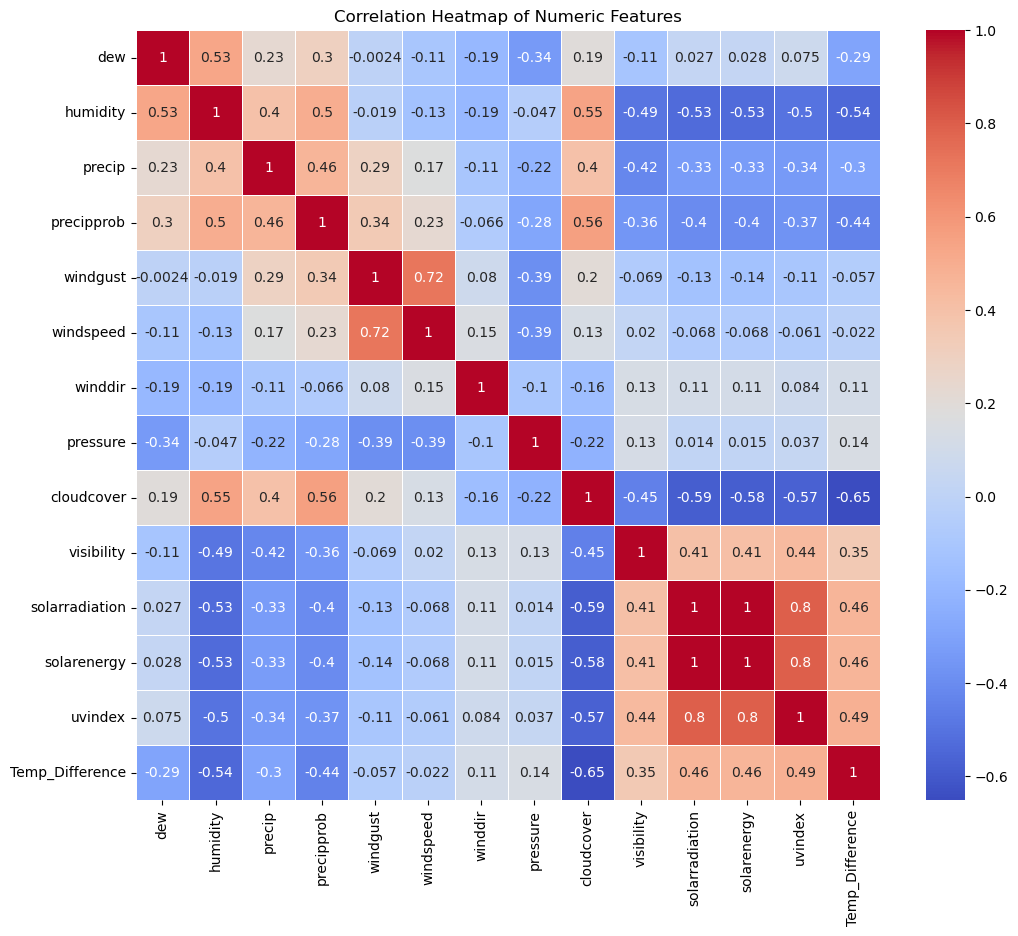

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

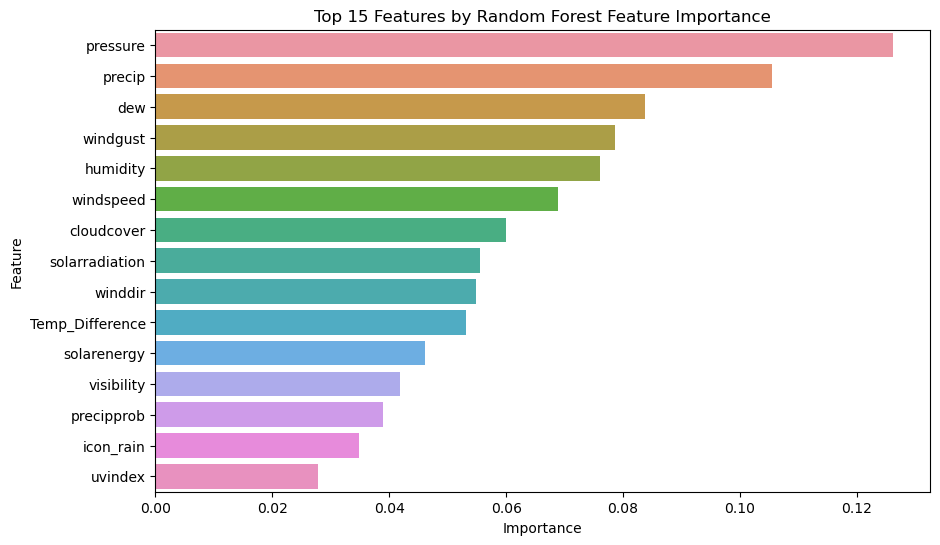

In [115]:
from sklearn.ensemble import RandomForestClassifier
X = weather_by_date.drop(['Tornado', 'datetime'], axis=1)  # Remove target and datetime
y = weather_by_date['Tornado']
X = pd.get_dummies(X, columns=['icon', 'Region'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


importance = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features by Random Forest Feature Importance')
plt.show()

In [116]:
feature_selection = weather_by_date.drop(columns = ['solarradiation', 'Temp_Difference', 'solarenergy','visibility', 'precipprob', 'uvindex'])

In [117]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



X = feature_selection.drop(['Tornado', 'datetime'], axis=1)
y = feature_selection['Tornado']

X = pd.get_dummies(X, columns=['Region', 'icon'])

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# class_weights = {0: 1, 1: 10}
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       154
           1       0.74      0.63      0.68        46

    accuracy                           0.86       200
   macro avg       0.82      0.78      0.80       200
weighted avg       0.86      0.86      0.86       200


Confusion Matrix:
[[144  10]
 [ 17  29]]


In [140]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



X = weather_by_date.drop(['Tornado', 'datetime'], axis=1)
y = weather_by_date['Tornado']

X = pd.get_dummies(X, columns=['Region', 'icon'])

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# class_weights = {0: 1, 1: 10}
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.88      0.94      0.91       154
           1       0.75      0.59      0.66        46

    accuracy                           0.86       200
   macro avg       0.82      0.76      0.79       200
weighted avg       0.85      0.86      0.85       200


Confusion Matrix:
[[145   9]
 [ 19  27]]


In [119]:
dt_classifier = DecisionTreeClassifier( random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       154
           1       0.64      0.63      0.64        46

    accuracy                           0.83       200
   macro avg       0.77      0.76      0.77       200
weighted avg       0.83      0.83      0.83       200


Confusion Matrix:
[[138  16]
 [ 17  29]]


In [138]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.9        0.83       0.86934673 0.83919598 0.87939698]
Mean CV score: 0.8635879396984926


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, model.predict(X_test)))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))




Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       154
           1       0.52      0.76      0.62        46

    accuracy                           0.79       200
   macro avg       0.72      0.78      0.73       200
weighted avg       0.83      0.79      0.80       200


Confusion Matrix:
[[138  16]
 [ 17  29]]

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       154
           1       0.74      0.57      0.64        46

    accuracy                           0.85       200
   macro avg       0.81      0.75      0.78       200
weighted avg       0.85      0.85      0.85       200


Confusion Matrix:
[[138  16]
 [ 17  29]]

SVM Performance:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       154
           1       0.57      0.70      0.63        46

    accuracy      

In [137]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 important features:")
print(feature_importance.head(10))


Top 10 important features:
       feature  importance
7     pressure    0.153444
0          dew    0.091230
26   icon_rain    0.088496
2       precip    0.086590
3   precipprob    0.068459
5    windspeed    0.059198
6      winddir    0.058804
9   visibility    0.047271
8   cloudcover    0.047145
1     humidity    0.046480


In [129]:
from sklearn.model_selection import RandomizedSearchCV

# Example for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42)
rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)


Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


In [130]:
y_pred = rf_random.predict(X_test)

print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       154
           1       0.81      0.46      0.58        46

    accuracy                           0.85       200
   macro avg       0.83      0.71      0.75       200
weighted avg       0.85      0.85      0.83       200


Confusion Matrix:
[[149   5]
 [ 25  21]]


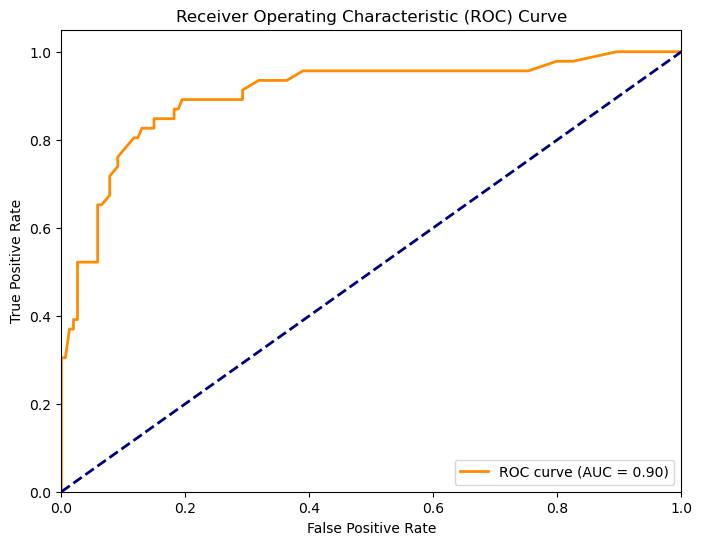

In [136]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

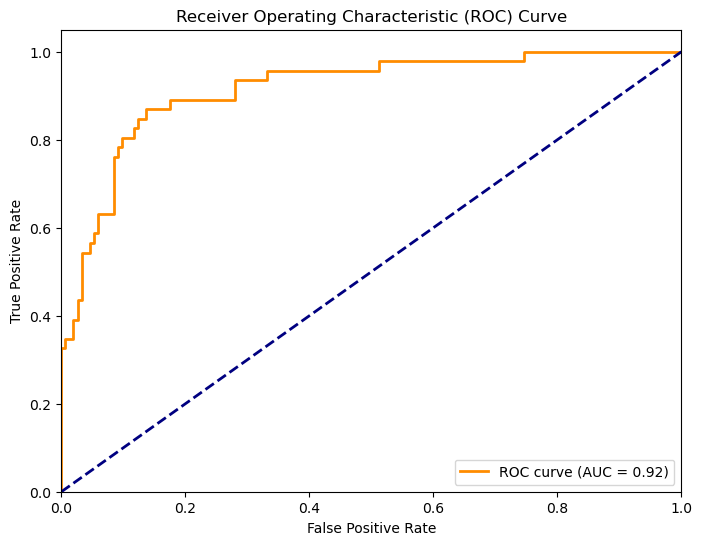

In [134]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_random.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()